# 2일차 과제
(텐서버전, 케라스버전)
0. boston 상관관계 : heat map (상관관계가 0.2 이하인 칼럼 출력)
1. train, test : train으로 학습
2. train의 0번째 행의 중위가격 예측
3. train, test 결정계수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
boston = pd.read_csv('data/boston.csv', index_col = 'Unnamed: 0')

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# [1] 상관관계 분석

## [1-1] 히트맵 생성

In [4]:
import seaborn as sns

<Axes: >

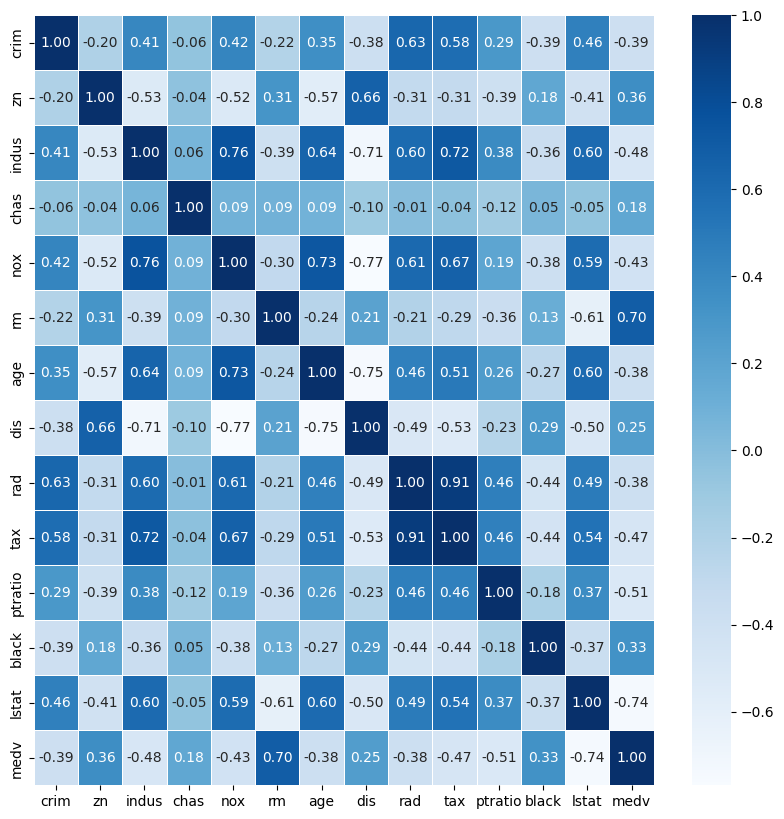

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data = boston.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## [1-2] 상관관계 <=- 0.2 출력

In [27]:
boston.corr()[np.abs(boston.corr()) <= 0.2]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,NaN,NaN,NaN,-0.055892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,NaN,NaN,-0.042697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175520,NaN,NaN
indus,NaN,NaN,NaN,0.062938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chas,-0.055892,-0.042697,0.062938,NaN,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.17526
nox,NaN,NaN,NaN,0.091203,NaN,NaN,NaN,NaN,NaN,NaN,0.188933,NaN,NaN,NaN
rm,NaN,NaN,NaN,0.091251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128069,NaN,NaN
age,NaN,NaN,NaN,0.086518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,NaN,-0.099176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,-0.007368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,NaN,NaN,NaN,-0.035587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# [2] Train test 분리, 학습

In [6]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,[-1]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [8]:
x_train = tf.constant(X_train, tf.float32)
y_train = tf.constant(y_train, tf.float32)
x_test = tf.constant(X_test, tf.float32)
y_test = tf.constant(y_test, tf.float32)
w = tf.Variable(tf.random.uniform([13,1]))
b = tf.Variable(tf.random.uniform([1]))

In [9]:
x_train.shape, y_train.shape

(TensorShape([404, 13]), TensorShape([404, 1]))

In [10]:
def compute_loss():
    hx = tf.matmul(x_train, w) + b
    c = tf.reduce_mean((hx - y_train)**2)
    return c

In [18]:
optimizer = Adam(0.01)
hist_loss=[]
for i in range(2000):
    c = compute_loss().numpy()
    hist_loss.append( c )
    optimizer.minimize(compute_loss, var_list=[w,b])
    print(i, 'cost:', c)

0 cost: 40.221798
1 cost: 103.98381
2 cost: 41.448822
3 cost: 65.00064
4 cost: 80.9604
5 cost: 60.862556
6 cost: 41.806004
7 cost: 44.220093
8 cost: 57.48276
9 cost: 60.722363
10 cost: 51.59655
11 cost: 41.82532
12 cost: 40.827118
13 cost: 47.047455
14 cost: 51.519543
15 cost: 49.16491
16 cost: 43.2343
17 cost: 39.95145
18 cost: 41.74657
19 cost: 45.383442
20 cost: 46.270218
21 cost: 43.62183
22 cost: 40.530468
23 cost: 40.033855
24 cost: 41.945312
25 cost: 43.52453
26 cost: 42.87589
27 cost: 40.887497
28 cost: 39.779793
29 cost: 40.454796
30 cost: 41.68412
31 cost: 41.820347
32 cost: 40.753563
33 cost: 39.786953
34 cost: 39.90573
35 cost: 40.67232
36 cost: 40.957523
37 cost: 40.402332
38 cost: 39.729053
39 cost: 39.692505
40 cost: 40.148098
41 cost: 40.367714
42 cost: 40.044056
43 cost: 39.612667
44 cost: 39.579395
45 cost: 39.858612
46 cost: 39.97582
47 cost: 39.750736
48 cost: 39.48864
49 cost: 39.49635
50 cost: 39.66962
51 cost: 39.699097
52 cost: 39.525703
53 cost: 39.38166
54 cos

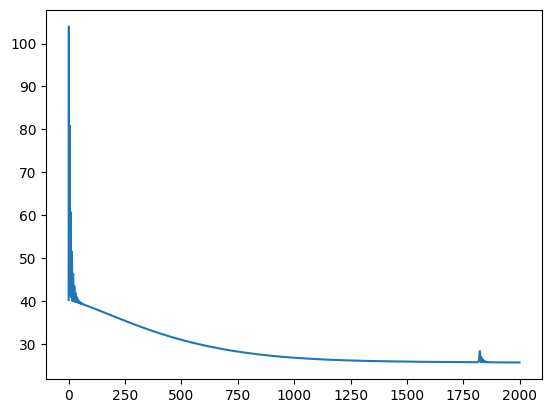

In [19]:
plt.plot( hist_loss )

In [20]:
def hxfn(xdata):
    xd = np.float32(xdata)
    # print(xd.shape)
    hx = tf.matmul(xd, w) + b
    return hx.numpy()

In [115]:
y_train[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[18.5],
       [19.6],
       [33.2],
       [13.1],
       [ 7.5],
       [13.6],
       [17.4],
       [ 8.4],
       [35.4],
       [24. ]], dtype=float32)>

In [21]:
hxfn(x_train)

array([[26.19416  ],
       [37.46849  ],
       [17.385658 ],
       [23.5324   ],
       [25.964233 ],
       [10.621022 ],
       [16.548325 ],
       [11.154323 ],
       [27.523762 ],
       [19.189537 ],
       [24.35208  ],
       [20.92284  ],
       [31.406641 ],
       [-1.606534 ],
       [15.7666235],
       [15.487846 ],
       [19.562368 ],
       [18.644562 ],
       [19.719303 ],
       [22.991848 ],
       [28.965607 ],
       [19.18364  ],
       [23.374605 ],
       [33.712486 ],
       [21.134602 ],
       [18.483416 ],
       [22.420187 ],
       [16.149101 ],
       [21.273838 ],
       [21.979261 ],
       [20.57809  ],
       [14.905563 ],
       [24.026863 ],
       [45.776237 ],
       [27.431845 ],
       [36.75799  ],
       [10.835461 ],
       [21.934597 ],
       [35.2028   ],
       [23.145575 ],
       [39.08728  ],
       [26.436205 ],
       [ 7.394949 ],
       [21.204248 ],
       [ 9.8729725],
       [16.41094  ],
       [20.262163 ],
       [15.59

In [22]:
from sklearn.metrics import r2_score

r2_score(y_train, hxfn(x_train))

0.7191081747963615

In [23]:
r2_score(y_test, hxfn(x_test))

0.6388810206432675